In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

In [ ]:
# import datasets
df_application_record=pd.read_csv("application_record.csv")
df_credit_record=pd.read_csv("credit_record.csv")

In [ ]:
df_application_record.columns # check columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_application_record.shape # check dimensions

(438557, 18)

In [ ]:
df_credit_record.columns # check columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
df_credit_record.shape # check dimensions

(1048575, 3)

In [ ]:
df_join=df_application_record.merge(df_credit_record,"inner", on=["ID"]) # join 2 datasets using inner join method
df_join.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [ ]:
df_join.columns #  check columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
df_join.shape # check dimensions

(777715, 20)

In [ ]:
df_join.info() # get some informations about joined dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_join.describe() # see statictical information

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [ ]:
df_join.isnull().sum().sum() # check general missing values

240048

In [ ]:
df_join.isnull().sum() # check missing values by each column

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [ ]:
!pip3 install missingno 

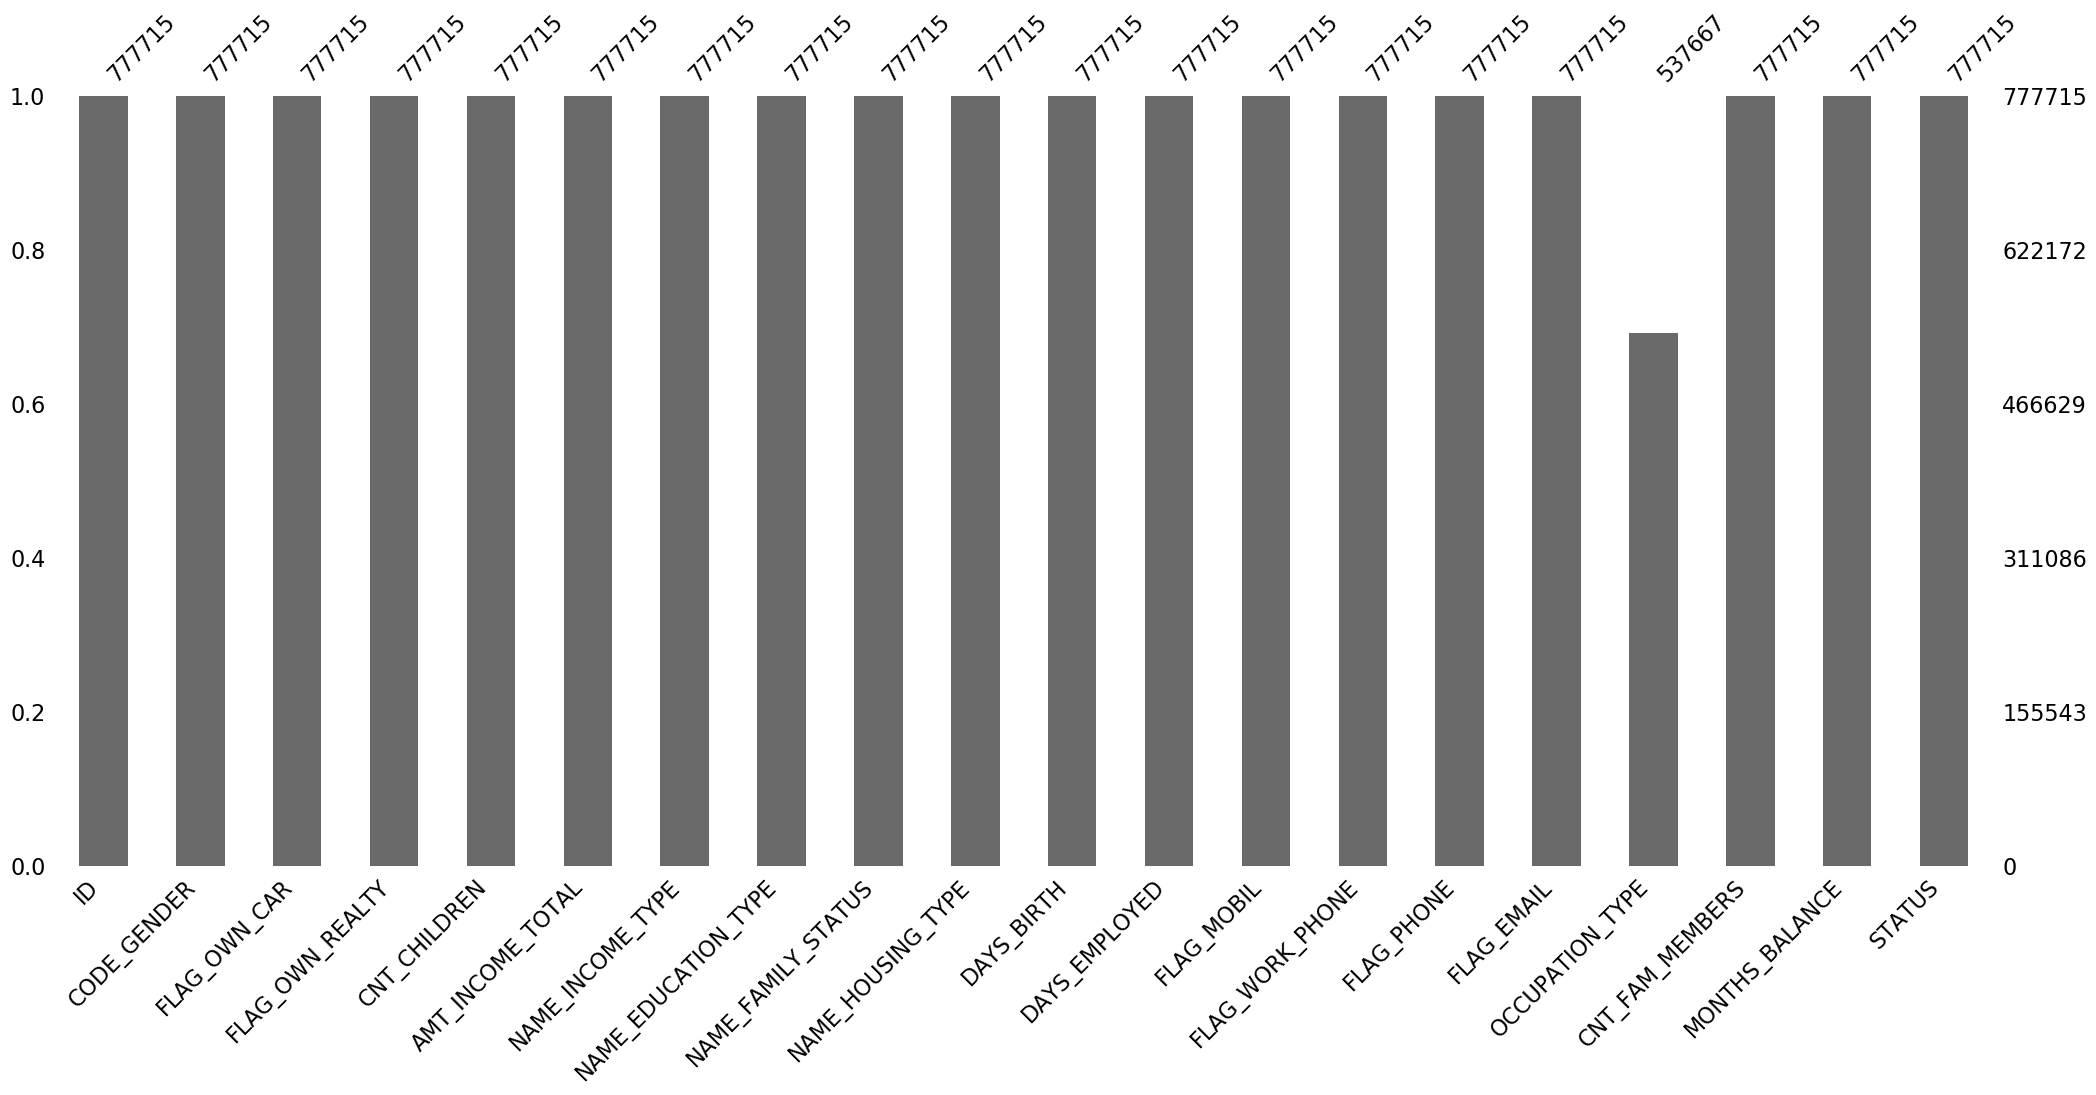

In [ ]:
# chechk null values graphically
import missingno as msno
msno.bar(df_join) # visual missing values

In [ ]:
df_join.fillna("unknown", inplace=True) # replace missing values by "unknown"

In [ ]:
df_join.isnull().sum().sum() # again check missing values

0

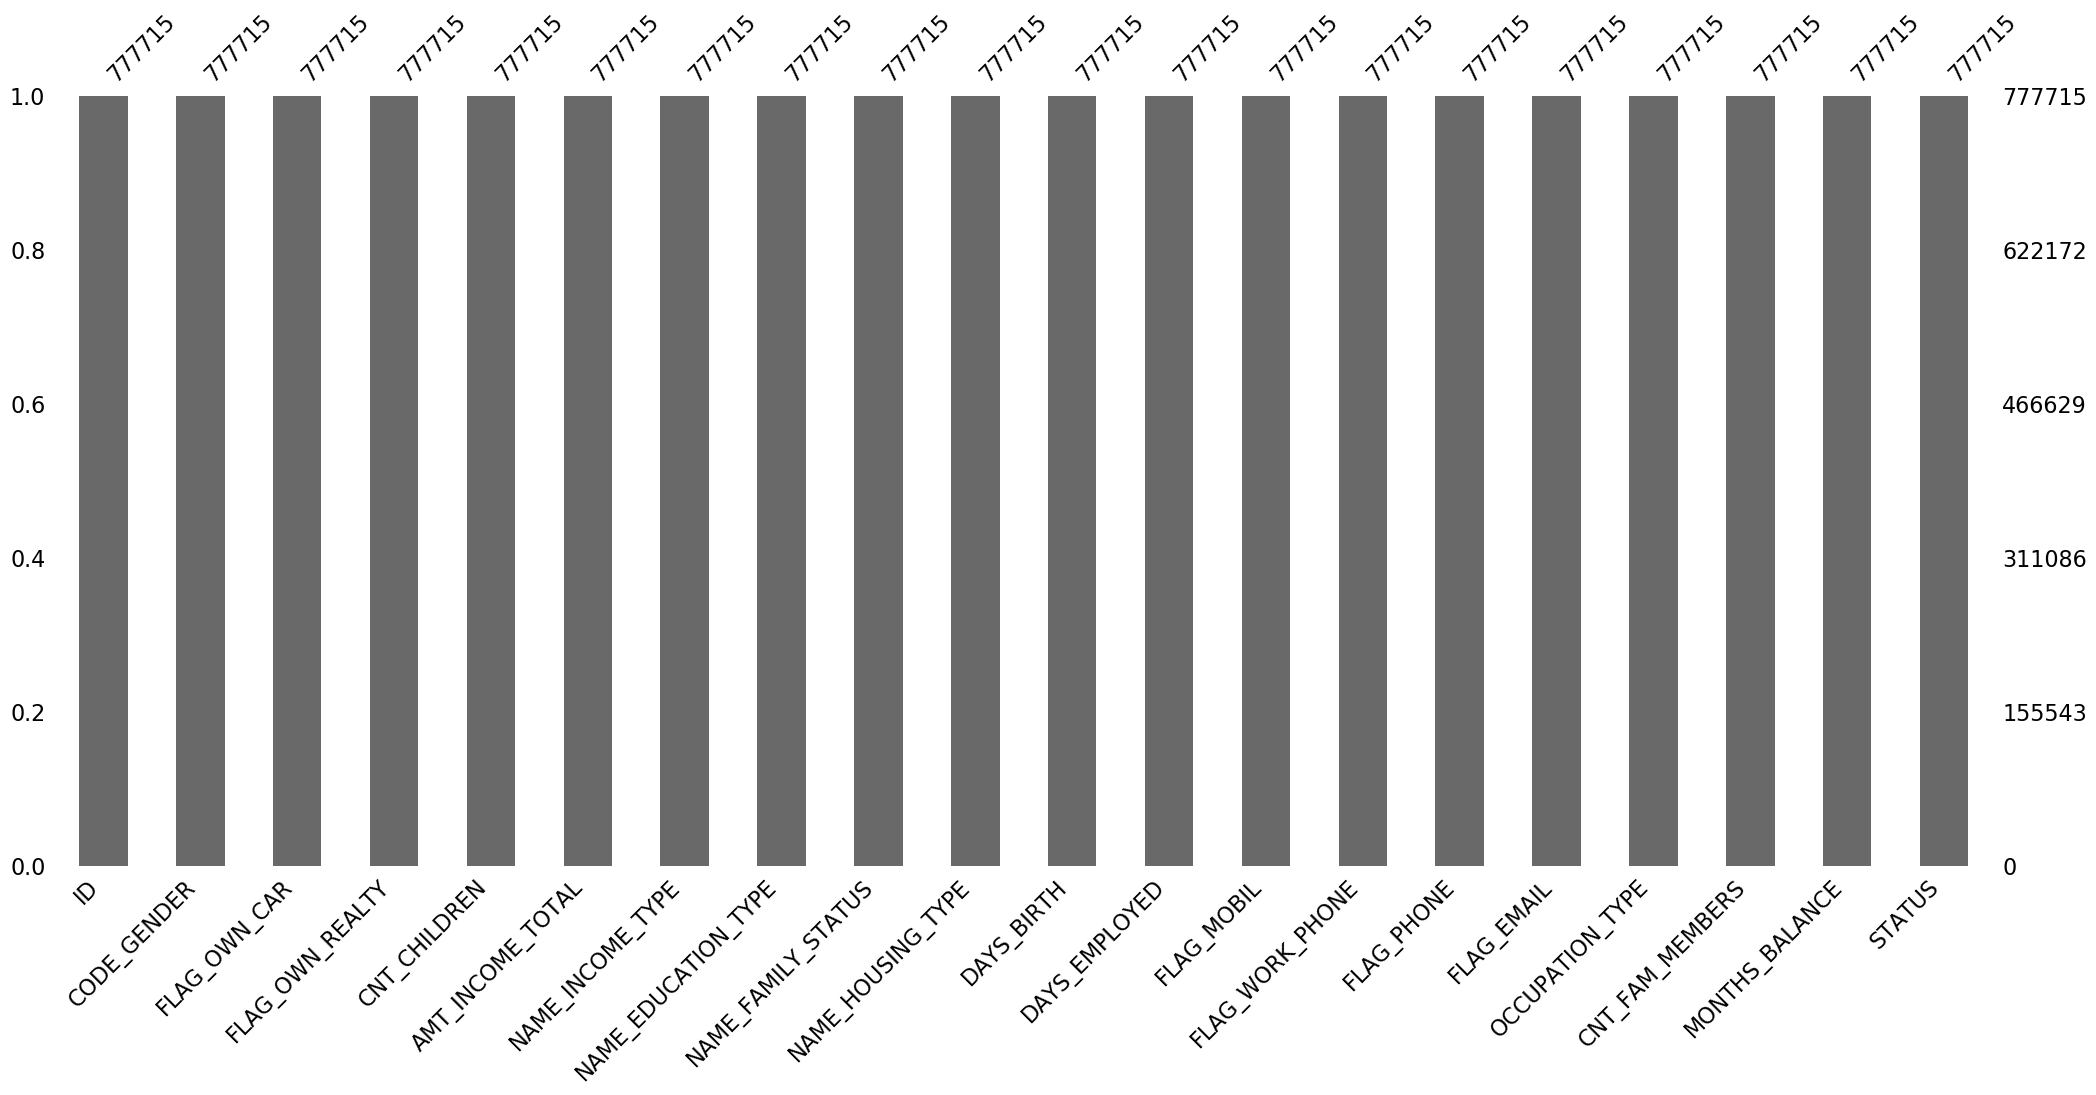

In [ ]:
msno.bar(df_join) # check graphically

In [ ]:
df_join.head() # to show 5 observations

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,unknown,2.0,-4,C


In [ ]:
df_join.duplicated().sum() # check duplicated entries

0

In [ ]:
def create_barplot(data): # help to create bar plots
  newData=dict(zip(list(data.unique()),list(data.value_counts())))
  plt.bar(newData.keys(),newData.values())
  
def create_pie(data): # help to create pie charts
  newData=dict(zip(list(data.unique()),list(data.value_counts())))
  plt.pie(newData.values(),labels=newData.keys(), explode=(0, 0.1), autopct='%1.1f%%')

In [ ]:
df_join.CODE_GENDER.nunique() # check amount of unique values for gender column

2

In [ ]:
df_join.CODE_GENDER.value_counts()  # check unique values for gender column

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

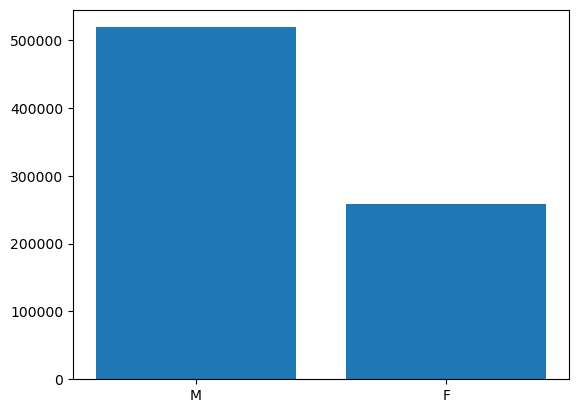

In [ ]:
create_barplot(df_join.CODE_GENDER) # check graphically unique values for gender column

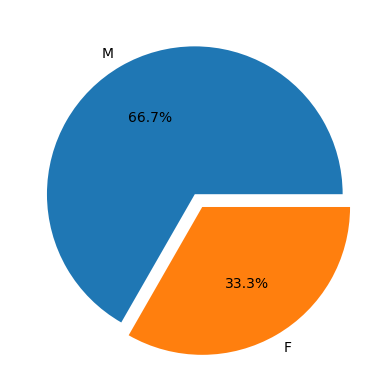

In [ ]:
create_pie(df_join.CODE_GENDER)

In [ ]:
df_join.FLAG_OWN_CAR.nunique() # check amount of unique values for FLAG_OWN_CAR column

2

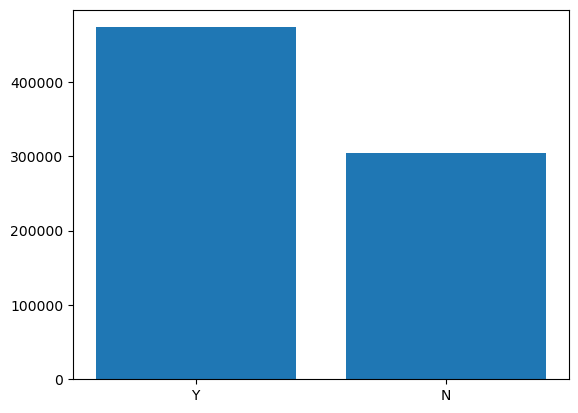

In [ ]:
create_barplot(df_join.FLAG_OWN_CAR) # check graphically unique values for FLAG_OWN_CAR column

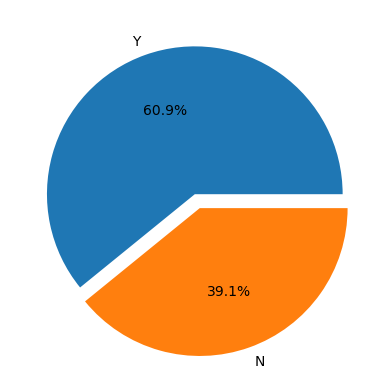

In [ ]:
create_pie(df_join.FLAG_OWN_CAR)

In [ ]:
df_join.FLAG_OWN_REALTY.nunique()

2

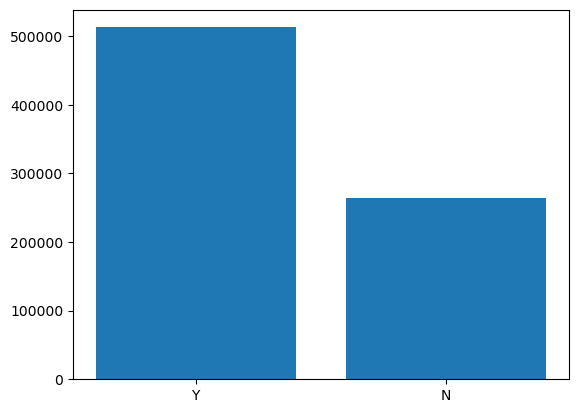

In [ ]:
create_barplot(df_join.FLAG_OWN_REALTY)

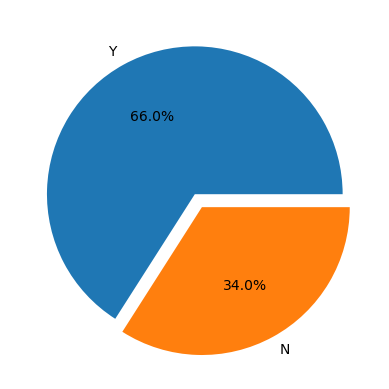

In [ ]:
create_pie(df_join.FLAG_OWN_REALTY)

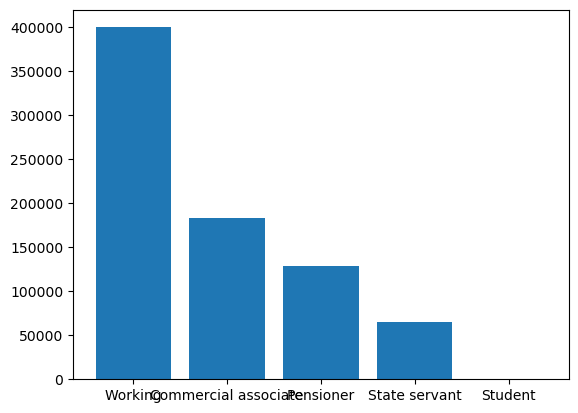

In [ ]:
# plt.figure(figure=(6,10))
create_barplot(df_join["NAME_INCOME_TYPE"])

In [ ]:
df_join.drop("ID",axis=1, inplace=True) # remove ID column because it is meaningless for calculations

In [ ]:
# to get normal date 
df_join['DAYS_BIRTH']=[(datetime.date.today().year-datetime.datetime.strptime((
    datetime.date.today()+
    timedelta(x)).strftime('%Y-%m-%d'),'%Y-%m-%d').year) for x in df_join['DAYS_BIRTH']]
df_join['DAYS_EMPLOYED']=[(datetime.date.today().year-datetime.datetime.strptime((
    datetime.date.today()+
    timedelta(x)).strftime('%Y-%m-%d'),'%Y-%m-%d').year) for x in df_join['DAYS_EMPLOYED']]

In [ ]:
df_join.columns # check again column names

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
df_join.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-1,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-2,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-3,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-4,C
5,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-5,C
6,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-6,C
7,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-7,C
8,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-8,C
9,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,1,0,0,unknown,2.0,-9,C


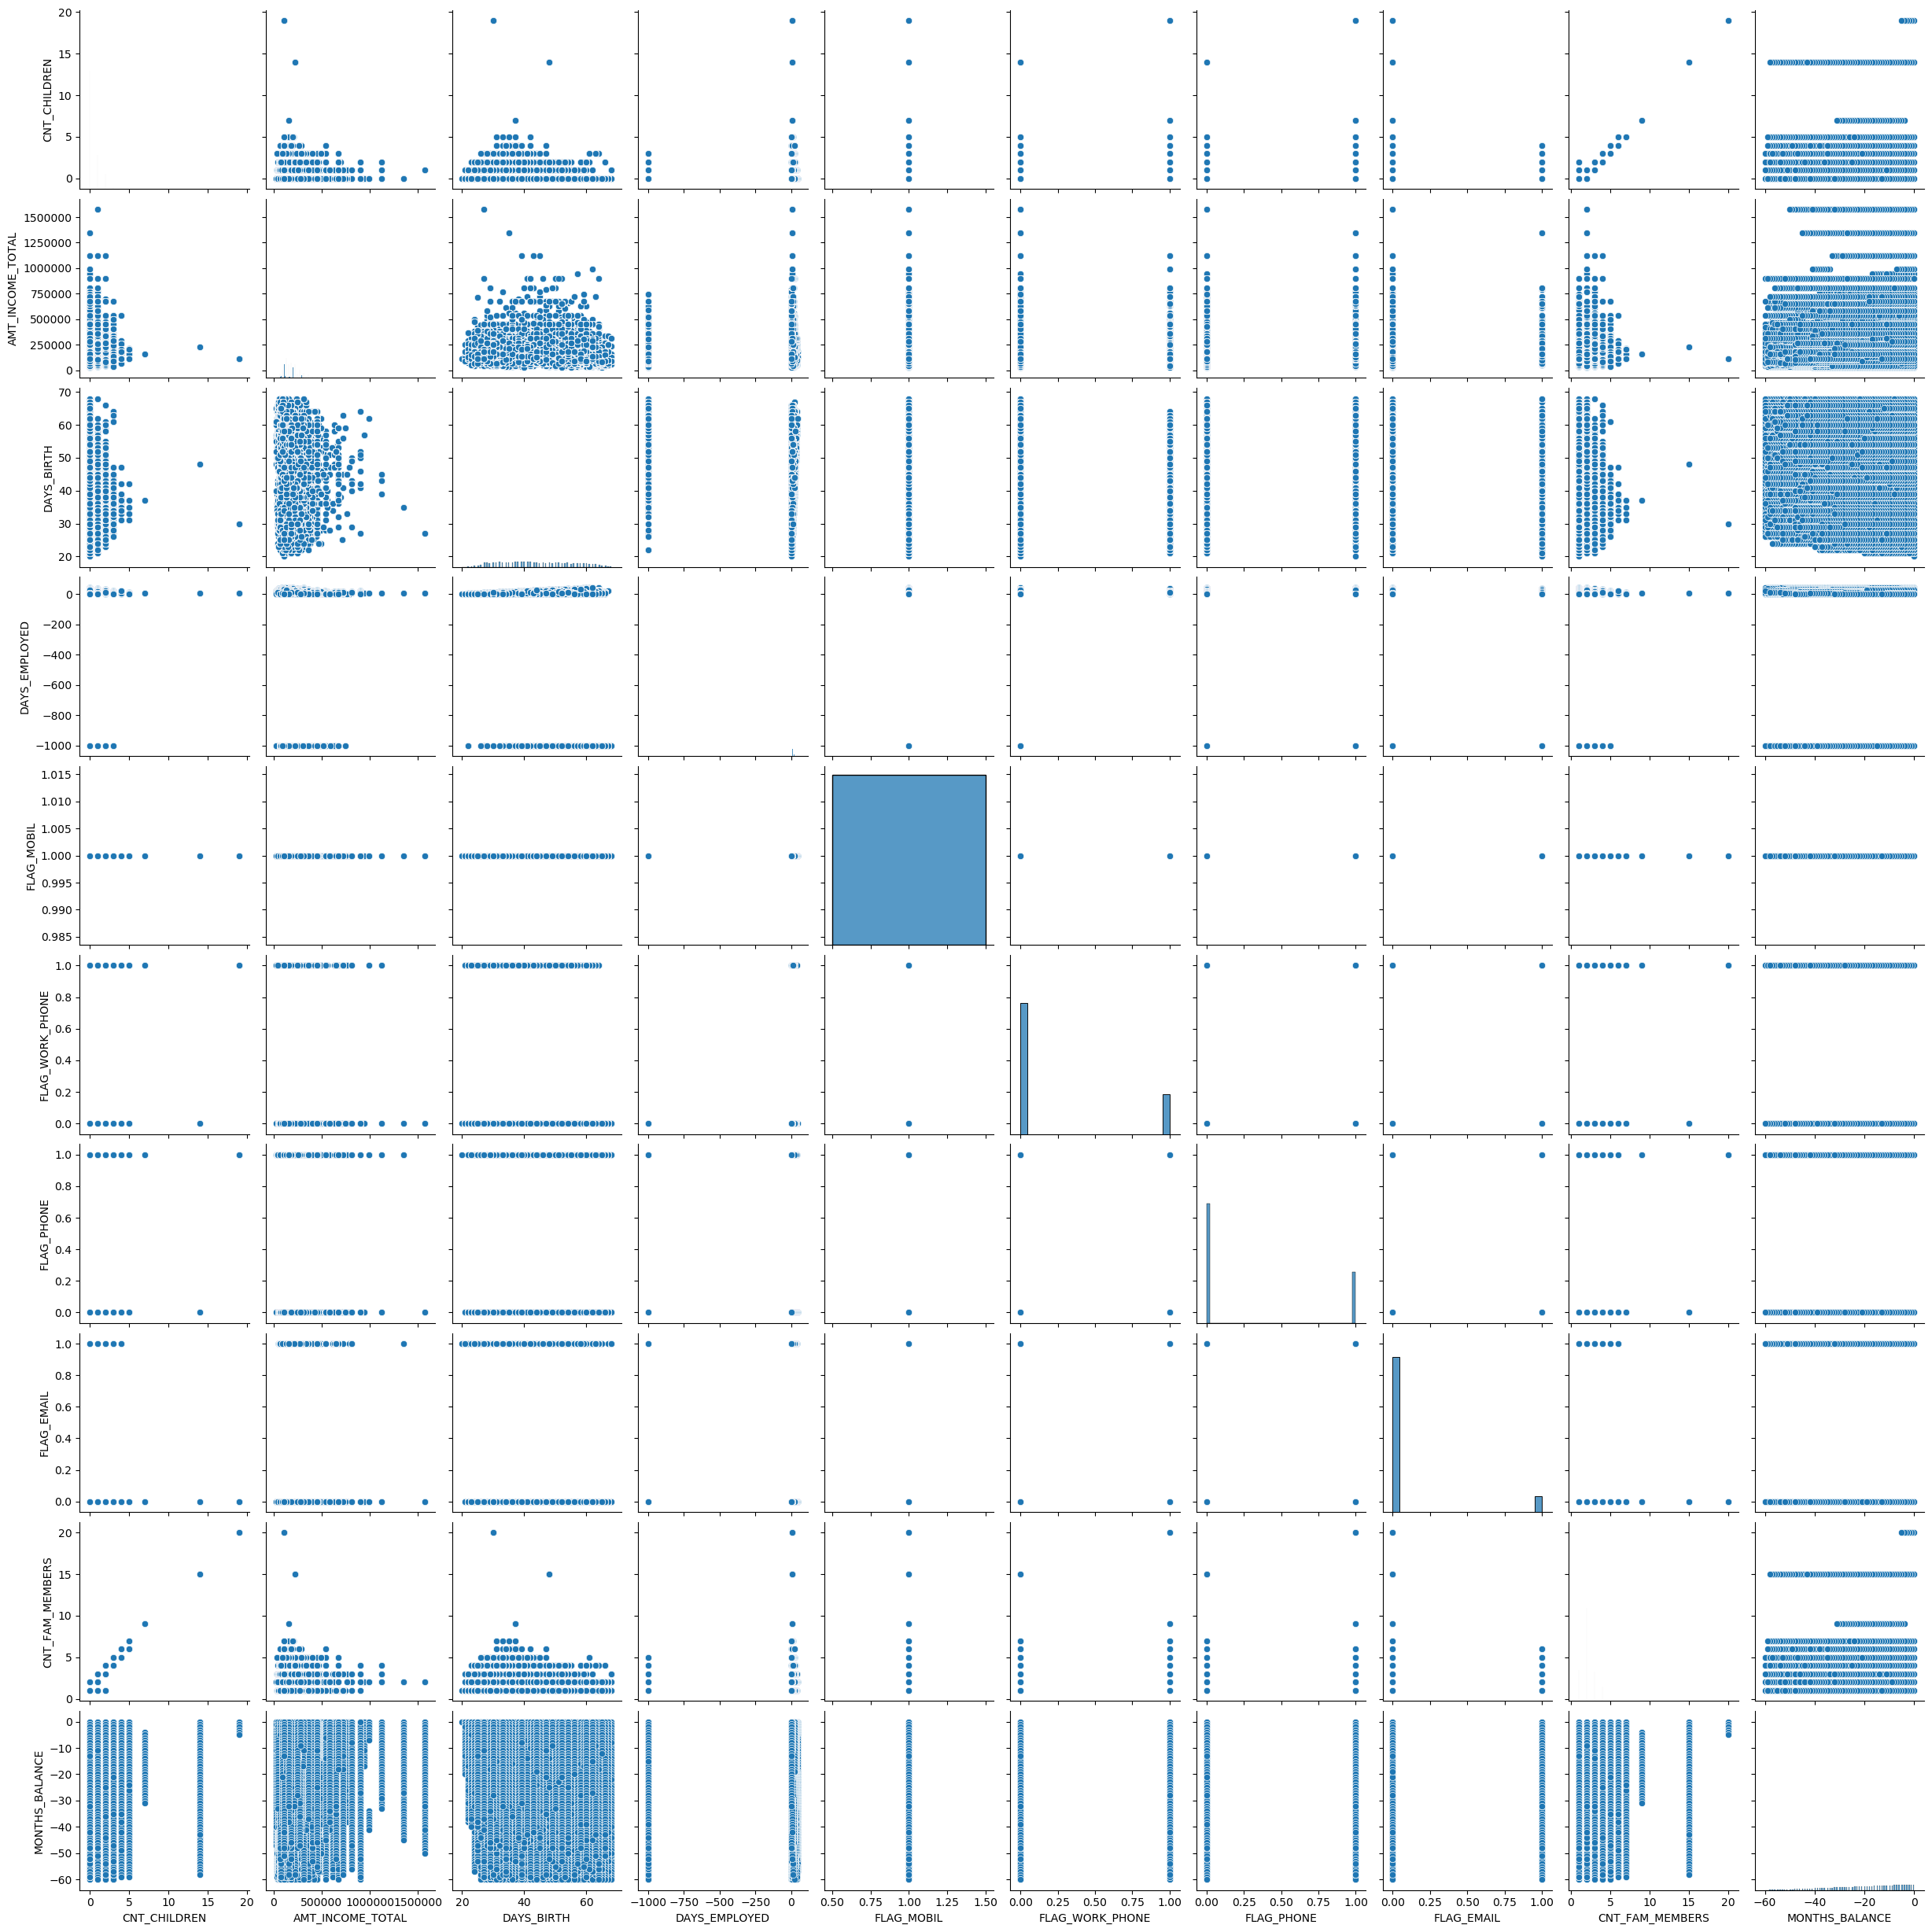

In [ ]:
sns.pairplot(df_join) # show distributions by each column

In [ ]:
# outliers are one of the data visualization methods, 
# where the data is distributed on a box and whisker 

def detect_outliers(df): # check outliers
    outliers = []
    df = sorted(df)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in df:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return len(outliers)

In [ ]:
for i in df_join.select_dtypes(include=["int64","float"]).columns:
    outliers_per_column = detect_outliers(df_join[i])
    print(f"{i} outliers from IQR method: ", outliers_per_column)

CNT_CHILDREN outliers from IQR method:  11039
AMT_INCOME_TOTAL outliers from IQR method:  33987
DAYS_BIRTH outliers from IQR method:  0
DAYS_EMPLOYED outliers from IQR method:  158504
FLAG_MOBIL outliers from IQR method:  0
FLAG_WORK_PHONE outliers from IQR method:  180288
FLAG_PHONE outliers from IQR method:  0
FLAG_EMAIL outliers from IQR method:  71297
CNT_FAM_MEMBERS outliers from IQR method:  10631
MONTHS_BALANCE outliers from IQR method:  0


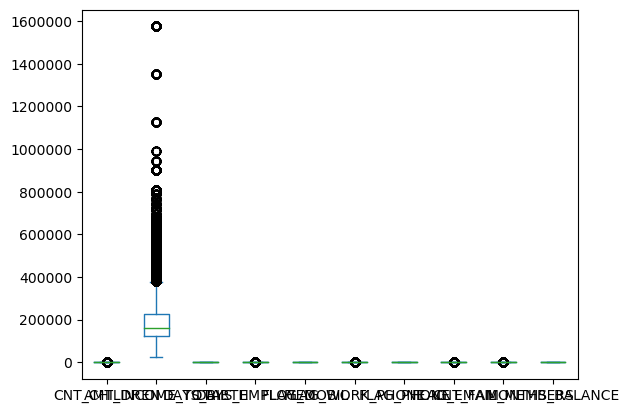

In [ ]:
# plt.figure(figsize = (16,10))
df_join.plot(kind="box") # check outliers graphically

In [ ]:
# standardizing data using StandardScaler
scaler = StandardScaler()
df_join[df_join.select_dtypes(include=["int64","float"]).columns]=scaler.fit_transform(df_join.select_dtypes(include=["int64","float"]))

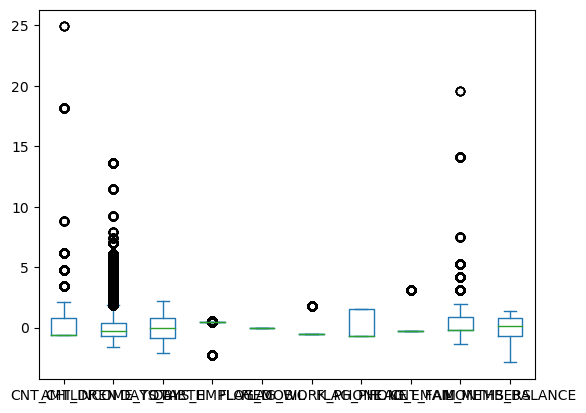

In [ ]:
# plt.figure(figsize = (16,10))
# sns.boxplot(df_join)
df_join.plot(kind="box") # check graphically how data changed

In [ ]:
# considering STATUS column to create target
print(f"Unique values of STATUS column: {df_join['STATUS'].nunique()} \n\n")

print(f'{df_join["STATUS"].value_counts()}')

Unique values of STATUS column: 8 


C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64


In [ ]:
target= list(map(lambda value : 0 if value in ("X", "C", '0', '1') else 1, df_join["STATUS"])) # creating target

In [ ]:
# convert categorical data to numerical data
encoder = LabelEncoder()
for i in df_join.select_dtypes(exclude=["int64","float"]).columns:
    df_join[i] = encoder.fit_transform(df_join[i].values)
df_join.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.375748,6
1,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.304737,6
2,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.233725,6
3,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.162714,6
4,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.091702,6
5,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,1.020690,6
6,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,0.949679,6
7,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,0.878667,6
8,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,0.807655,6
9,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,0.0,1.820367,-0.656158,-0.317691,18,-0.230155,0.736644,6


In [ ]:
# creating first model before adding target to the dataset
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_join) 

In [ ]:
kmeans.score(df_join) # check score

-15648870.338938128

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 4.19004717e-01,  4.55284409e-01,  6.43900968e-01,
         1.16967227e-01,  1.58392095e-01,  2.66922640e+00,
         3.02038922e+00,  1.29924095e+00,  1.30314262e+00,
        -2.47564556e-01,  4.44664265e-01,  0.00000000e+00,
         1.00278115e-01, -6.04001505e-03,  5.21874756e-02,
         6.19287294e+00,  1.11332526e-01, -1.95285037e-01,
         3.45475827e-02],
       [ 2.24785405e-01,  3.07365404e-01,  6.89808042e-01,
        -1.56978070e-01, -1.80102724e-01,  1.98757804e+00,
         3.15232149e+00,  1.41939115e+00,  1.20414165e+00,
         3.44221518e-01, -6.13768383e-01,  0.00000000e+00,
        -1.77101384e-01, -1.62849734e-02, -5.36857367e-02,
         1.70300755e+01, -1.58841190e-01,  1.24926469e-01,
         6.29149207e+00],
       [ 4.54902669e-01,  4.59337485e-01,  6.43367332e-01,
         9.37855548e-02,  1.59211602e-01,  2.70602040e+00,
         3.07936336e+00,  1.26803261e+00,  1.26389265e+00,
        -2.37552013e-01,  4.45908490e-01,  0.00000000e+00,
    

In [ ]:
df_join["target"]=target # add target into dataset

In [ ]:
df_join.columns # check updating column names

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'target'],
      dtype='object')

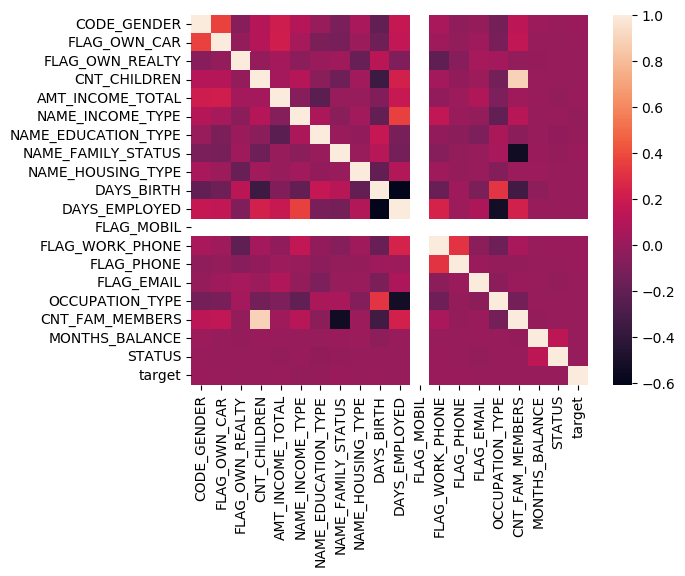

In [ ]:
sns.heatmap(df_join.corr()) # check correlations between columns

In [ ]:
df_join.FLAG_MOBIL.value_counts() # check unique values

0.0    777715
Name: FLAG_MOBIL, dtype: int64

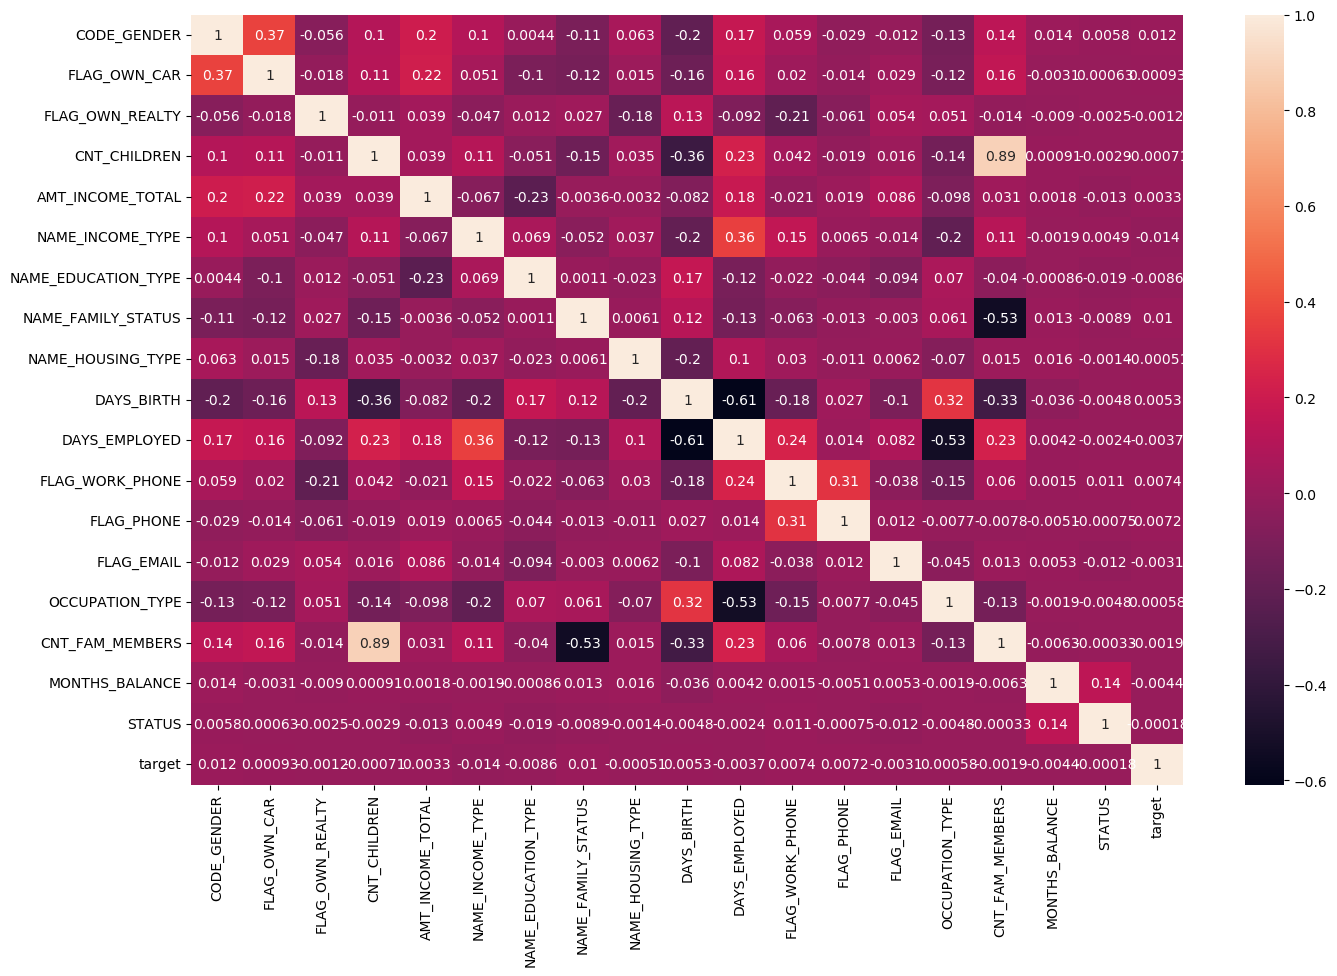

In [ ]:
# remove FLAG_MOBIL column because it doesn't influence others
df_join.drop("FLAG_MOBIL",axis=1,inplace=True) 
plt.figure(figsize = (16,10))
sns.heatmap(df_join.corr(),annot= True)

In [ ]:
df_join.shape # checkging new dataset

(777715, 19)

In [ ]:
df_join.target.value_counts() # check inbalance in dataset

0    774887
1      2828
Name: target, dtype: int64

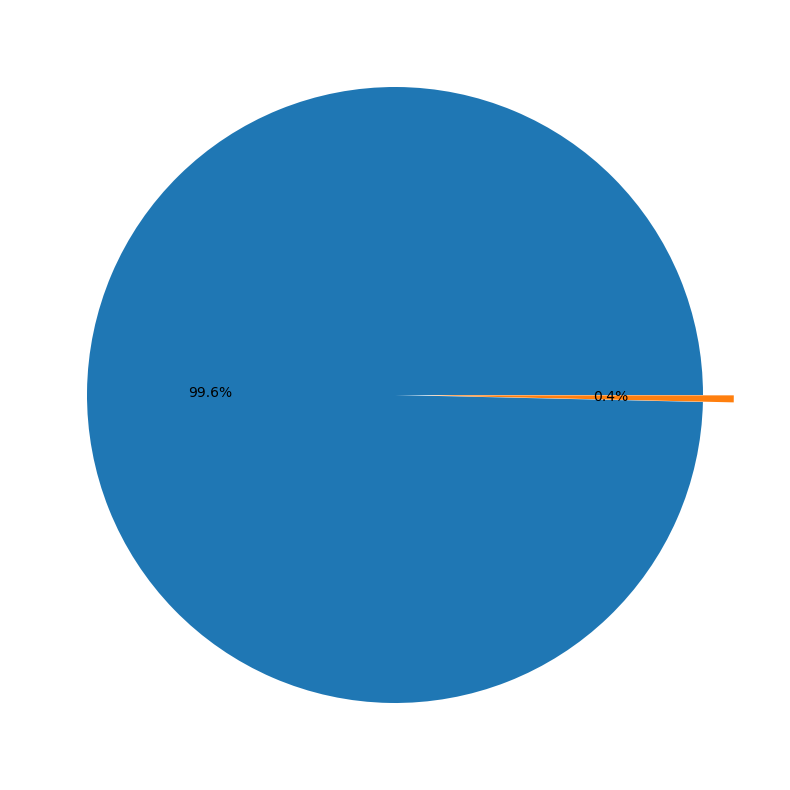

In [ ]:
# show graphically inbalance
plt.figure(figsize = (16,10)) 
plt.pie([(774887/777715)*100,(2828/777715)*100], explode=(0, 0.1), autopct='%1.1f%%');

In [ ]:
# create new model with imbalance
X = df_join.drop(['target'], axis=1)
y = df_join['target']
x_train ,x_test ,y_train,y_test = train_test_split(X, y,test_size=.3,random_state=0)

In [ ]:
df_join

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,target
0,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,1.820367,-0.656158,-0.317691,18,-0.230155,1.375748,6,0
1,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,1.820367,-0.656158,-0.317691,18,-0.230155,1.304737,6,0
2,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,1.820367,-0.656158,-0.317691,18,-0.230155,1.233725,6,0
3,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,1.820367,-0.656158,-0.317691,18,-0.230155,1.162714,6,0
4,1,1,1,-0.574026,2.351502,4,1,0,4,-1.041137,0.456658,1.820367,-0.656158,-0.317691,18,-0.230155,1.091702,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,1,0,1,-0.574026,-0.748209,4,4,3,4,-1.663976,0.432561,-0.549340,-0.656158,-0.317691,8,-1.332230,0.736644,0,0
777711,1,0,1,-0.574026,-0.748209,4,4,3,4,-1.663976,0.432561,-0.549340,-0.656158,-0.317691,8,-1.332230,0.665632,2,1
777712,1,0,1,-0.574026,-0.748209,4,4,3,4,-1.663976,0.432561,-0.549340,-0.656158,-0.317691,8,-1.332230,0.594620,1,0
777713,1,0,1,-0.574026,-0.748209,4,4,3,4,-1.663976,0.432561,-0.549340,-0.656158,-0.317691,8,-1.332230,0.523609,0,0


In [ ]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logistic.score(x_train,y_train) # show train score

0.9963501102130786

In [ ]:
logistic.score(x_test,y_test) # show test score

0.9963954310695841

In [ ]:
# using pipline
imputer = SimpleImputer()
pipe = make_pipeline(imputer, logistic)

pipe.fit(X, y)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
pipe.score(x_train, y_train)

0.9963501102130786

In [ ]:
pipe.score(x_test, y_test)

0.9963954310695841

In [ ]:
# using under sampling for inbalance and GridSearchCV

undersample = RandomUnderSampler(random_state=0)
X_resample, y_resample = undersample.fit_resample(X, y)


parameters_svc = {
    "gamma": ('scale', 'auto'),
    "shrinking": (True, False),
    "probability": (True, False),
    "verbose": (True, False),
    "decision_function_shape": ('ovo','ovr')
}

In [ ]:
y_resample.value_counts()

0    2828
1    2828
Name: target, dtype: int64

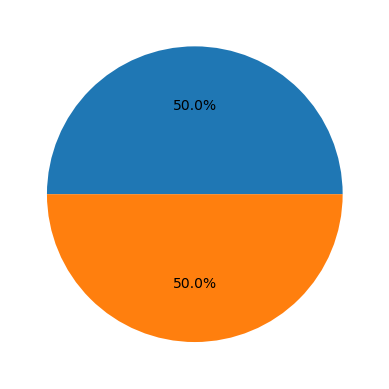

In [ ]:
plt.pie([(2828/(2828+2828))*100,(2828/(2828+2828))*100], autopct='%1.1f%%');

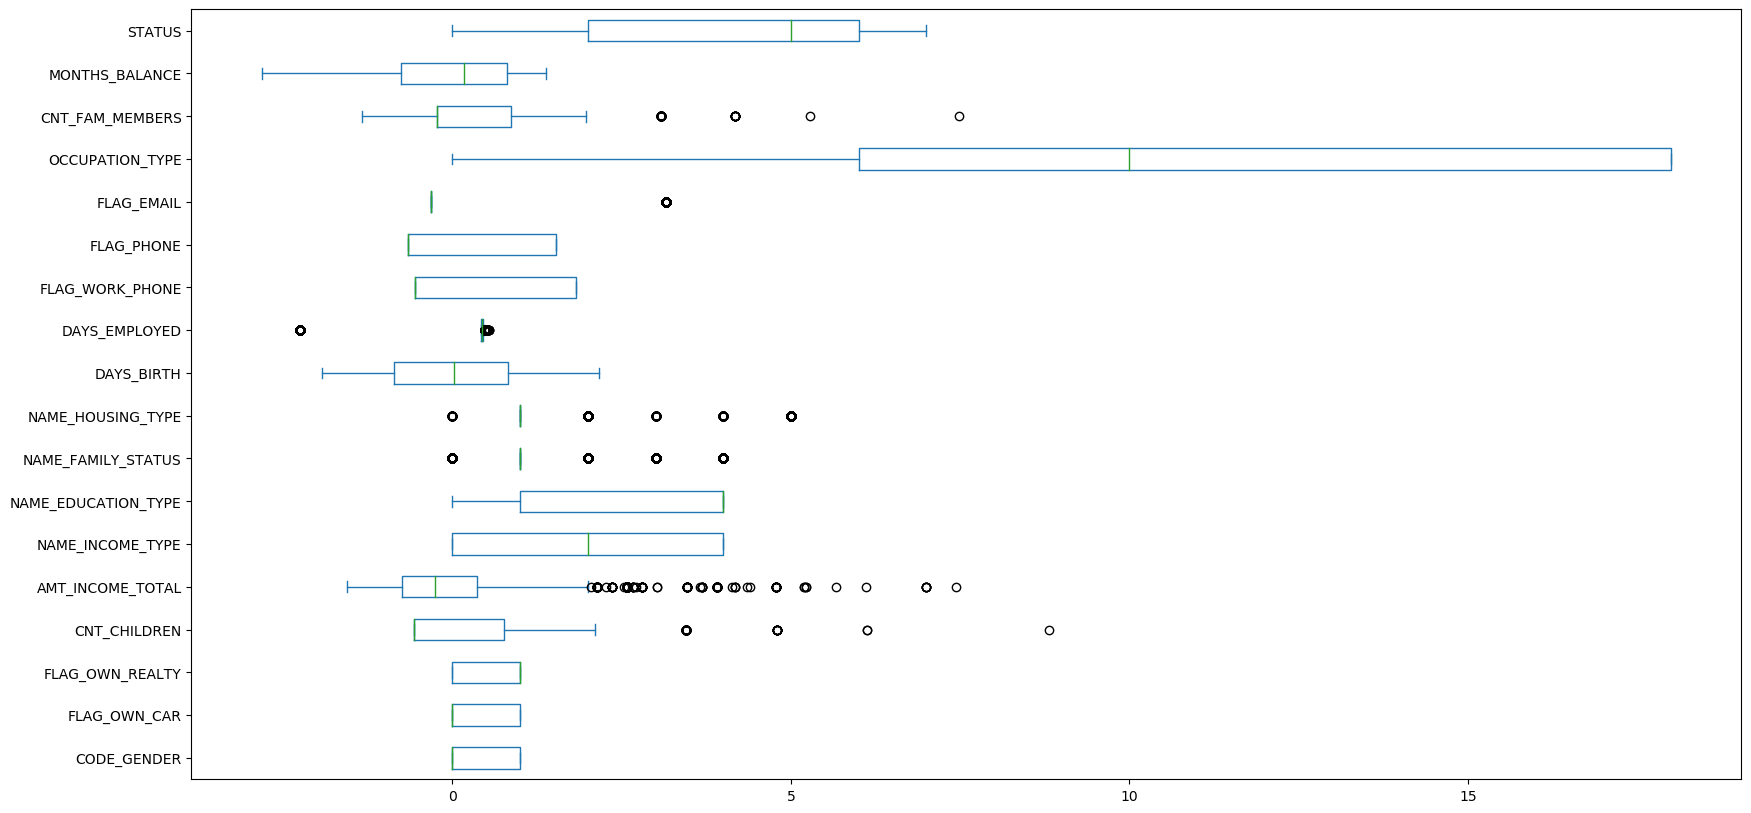

In [ ]:
X_resample.plot(kind="box",vert=False,figsize=(20,10))

In [ ]:
x_train ,x_test ,y_train,y_test = train_test_split(X_resample, y_resample,test_size=.3,random_state=42)

In [ ]:
# from sklearn.model_selection import cross_val_score,KFold
# cross_score=cross_val_score(SVC(),X,y,cv=KFold(n_splits=5))
# print(f"Cross Validation Scores are {cross_score}")
# print(f"Average Cross Validation score :{cross_score.mean()}")

In [ ]:
model=SVC()
opt = GridSearchCV(model, parameters_svc, scoring='f1')

In [ ]:
opt.fit(x_train, y_train)

[LibSVM].
*
optimization finished, #iter = 1554
obj = -1026.234270, rho = 8.072016
nSV = 1564, nBSV = 1497
Total nSV = 1564
.
*
optimization finished, #iter = 1562
obj = -1035.719287, rho = 8.185227
nSV = 1572, nBSV = 1502
Total nSV = 1572
.
**.*
optimization finished, #iter = 1806
obj = -1015.845875, rho = 8.005613
nSV = 1548, nBSV = 1467
Total nSV = 1548
.
*
optimization finished, #iter = 1573
obj = -1029.369624, rho = 7.889457
nSV = 1559, nBSV = 1486
Total nSV = 1559
.
*
optimization finished, #iter = 1610
obj = -1044.096557, rho = 8.211721
nSV = 1583, nBSV = 1509
Total nSV = 1583
.
*.*
optimization finished, #iter = 2020
obj = -1158.817265, rho = -8.402279
nSV = 1783, nBSV = 1700
Total nSV = 1783
[LibSVM].
*
optimization finished, #iter = 1585
obj = -1006.567832, rho = 7.918355
nSV = 1542, nBSV = 1473
Total nSV = 1542
.
*
optimization finished, #iter = 1563
obj = -1023.773489, rho = 8.004474
nSV = 1559, nBSV = 1486
Total nSV = 1559
.
*
optimization finished, #iter = 1699
obj = -101

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': ('scale', 'auto'),
                         'probability': (True, False),
                         'shrinking': (True, False), 'verbose': (True, False)},
             scoring='f1')

In [ ]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",opt.best_estimator_)
print("\n The best score across ALL searched params:\n",opt.best_score_)
print("\n The best parameters across ALL searched params:\n",opt.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(decision_function_shape='ovo', gamma='auto', probability=True, verbose=True)

 The best score across ALL searched params:
 0.9955420779018646

 The best parameters across ALL searched params:
 {'decision_function_shape': 'ovo', 'gamma': 'auto', 'probability': True, 'shrinking': True, 'verbose': True}


In [ ]:
y_pred = opt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       879
           1       0.99      1.00      0.99       818

    accuracy                           0.99      1697
   macro avg       0.99      0.99      0.99      1697
weighted avg       0.99      0.99      0.99      1697



In [ ]:
confusion_matrix(y_test,y_pred)

array([[870,   9],
       [  1, 817]])

In [ ]:
y_test.value_counts()

0    879
1    818
Name: target, dtype: int64

In [ ]:
pd.DataFrame(y_pred).value_counts()

0    871
1    826
dtype: int64

In [ ]:
# using over sampling

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y)
x_train ,x_test ,y_train,y_test = train_test_split(X_balanced, y_balanced,test_size=.3,random_state=42)

In [ ]:
logistic.score(x_train,y_train)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5003525862315307

In [ ]:
logistic.score(x_test,y_test)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.4991773008153863

In [ ]:
y_pred = logistic.predict(x_test)
print(classification_report(y_test, y_pred))

/home/elnur/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/elnur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elnur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    232084
           1       0.00      0.00      0.00    232849

    accuracy                           0.50    464933
   macro avg       0.25      0.50      0.33    464933
weighted avg       0.25      0.50      0.33    464933



/home/elnur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
parameters_logistic ={
    'max_iter' : range(100,200),
    'warm_start' : [True,False],
    'solver' : ["lnfgs","newton-cg","liblinear"],
    'C' : np.arange(0,1,0.01)
                    }

In [ ]:
model=SVC()
opt_logistic = GridSearchCV(logistic, parameters_logistic, scoring='f1')

In [ ]:
opt_logistic.fit(x_train,y_train)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:452: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_strength = 1.0 / C
/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:152: RuntimeWarning: invalid value encountered in double_scalars
  return loss + 0.5 * l2_reg_strength * norm2_w
/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_linear_loss.py:315: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = X.T @ gradient + l2_reg_strength * weights
/home/elnur/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/elnur/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSea

In [ ]:
y_pred = opt_logistic.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
y_test.value_counts()

In [ ]:

pd.DataFrame(y_pred).value_counts()

In [ ]:
y_pred = opt_logistic.predict(x_test)
print(classification_report(y_test, y_pred))